In [1]:
# 2173638 Shravan Singh
# 1871892 Umair Bham

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import geopandas as gpd

df = pd.read_csv('nyc_taxis.csv')
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


## Haversine function

In [2]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

# Question 1

In [3]:
# Dropping all rows where trip duration is <10 seconds. <10 seconds seems reasonable threshold
df = df.loc[df['trip_duration'] > 10]

# Forming distance column using haversine method
df['distance'] = haversine_np(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

# Dropping all rows where the distance is less than 50 meters. <50 meters seems reasonable threshold
df = df.loc[df['distance'] > 0.05]

# Dropping all rows where passengers > 6
# On uber website max passengers is 5 but pre corona might have been more. 6 Seems reasonable threshold
# https://www.uber.com/global/en/cities/new-york/
df = df.loc[df['passenger_count'] <= 6]

# Question 2

In [4]:
# Distance column already formed in the above question (Question 1)

# Converting object columns to datetime columns
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])

# Adding day of the week column
df['day_of_week'] = df['dropoff_datetime'].dt.day_name()

# Adding average speed column
df['average_speed'] = (df['distance']/df['trip_duration'])*3600

# Question 3

## Question 3.1

Text(0.5, 1.0, 'Day distribution of rides')

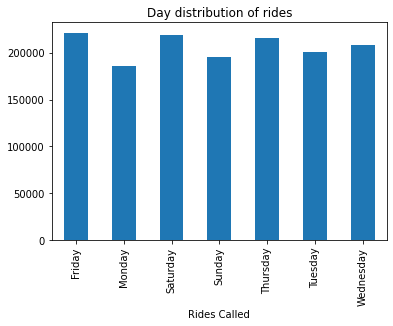

In [5]:
#Plot day distribution
day_distribution = df.groupby(['day_of_week'])['day_of_week'].size()
graph = day_distribution.plot.bar()
graph.set_xlabel("Day of the week")
graph.set_xlabel("Rides Called")
graph.set_title("Day distribution of rides")
# Fridays and Saturdays seem to be the most popular

## Question 3.2

In [6]:
df['hour'] = df['dropoff_datetime'].dt.hour
# Grouping by day and then hour
day_hour_groupby = df.groupby(['day_of_week','hour'])['day_of_week'].size()
day_hour_groupby.index = day_hour_groupby.index.set_names(['day','hours'])
day_hour_groupby = day_hour_groupby.reset_index()

In [7]:
# Getting all the subsets for days of the week
Monday = day_hour_groupby.loc[day_hour_groupby['day'] =="Monday"]
Tuesday = day_hour_groupby.loc[day_hour_groupby['day']=="Tuesday"]
Wednesday = day_hour_groupby.loc[day_hour_groupby['day']=="Wednesday"]
Thursday = day_hour_groupby.loc[day_hour_groupby['day']=="Thursday"]
Friday = day_hour_groupby.loc[day_hour_groupby['day']=="Friday"]
Saturday = day_hour_groupby.loc[day_hour_groupby['day']=="Saturday"]
Sunday = day_hour_groupby.loc[day_hour_groupby['day']=="Sunday"]

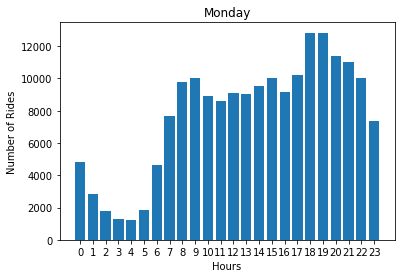

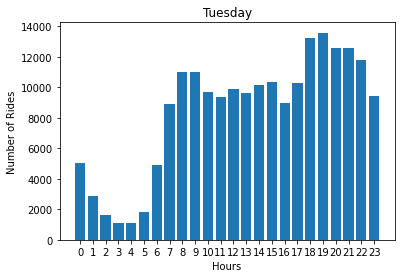

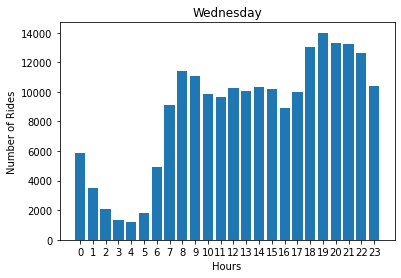

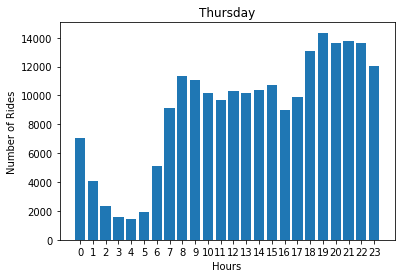

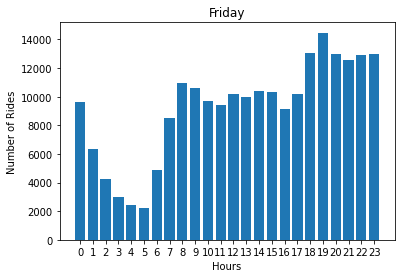

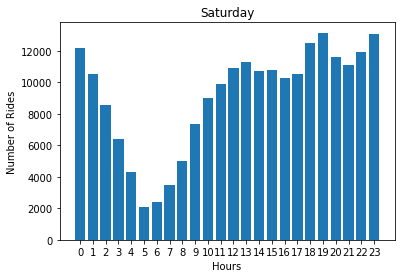

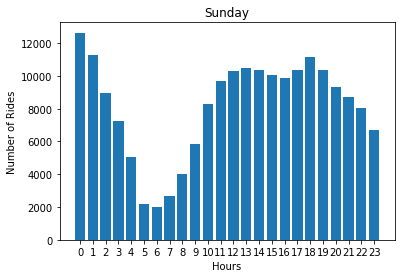

In [8]:
# Plotting 
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = Monday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Monday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Tuesday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Tuesday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Wednesday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Wednesday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Thursday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Thursday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Friday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Friday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Saturday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Saturday")
plt.bar(x,y)
plt.xticks(x)
plt.show()
y = Sunday['day_of_week'].values
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Sunday")
plt.bar(x,y)
plt.xticks(x)
plt.show()

In [9]:
# Every day except Sunday, 19:00 is the most popular hour
# On Sunday it is Midnight
# This makes sense because people go out on the weekends at night 
# In most days except those closer to the weekend we see a drop in rides in the early hours of the morning
# This makes sense because nobody is calling an uber at that time, no reason to. 

## Question 3.3

In [10]:
# During the weekdays in general, we see that there is not many rides being called late at night and in the early hours of the moring
# And during the weekends we see activity in the late hours of the night as well as early hours of the morning
# This makes sense because most people go out during the weekends so people call Ubers to get back home after partying

## Question 3.4

Text(0.5, 1.0, 'St Patricks Day')

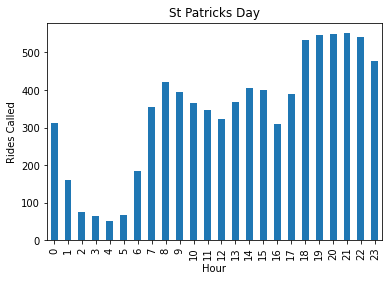

In [11]:
# Getting St Patricks Subset

date = '2016/03/17'
date = datetime.strptime(date, '%Y/%m/%d')
st_patricks = df.loc[df['pickup_datetime'].dt.date==date.date()]
st_patricks = st_patricks.groupby(['hour']).size()
graph = st_patricks.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Rides Called")
graph.set_title("St Patricks Day")

Text(0.5, 1.0, 'Easter')

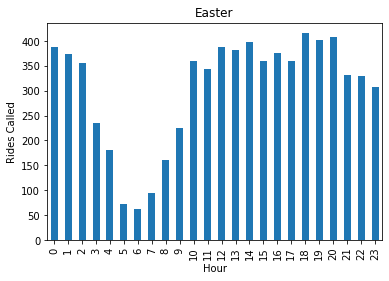

In [12]:
# Getting Easter Subset

date = '2016/03/27'
date = datetime.strptime(date, '%Y/%m/%d')
st_patricks = df.loc[df['pickup_datetime'].dt.date==date.date()]
st_patricks = st_patricks.groupby(['hour']).size()
graph = st_patricks.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Rides Called")
graph.set_title("Easter")

Text(0.5, 1.0, 'Memorial Day')

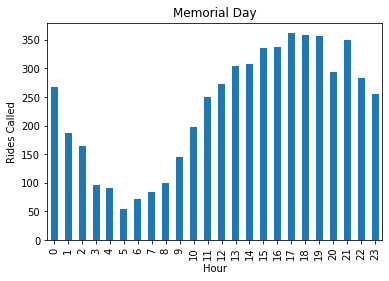

In [13]:
# Getting Memorial Day Subset

date = '2016/05/30'
date = datetime.strptime(date, '%Y/%m/%d')
st_patricks = df.loc[df['pickup_datetime'].dt.date==date.date()]
st_patricks = st_patricks.groupby(['hour']).size()
graph = st_patricks.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Rides Called")
graph.set_title("Memorial Day")

Text(0.5, 1.0, 'Valentines Day')

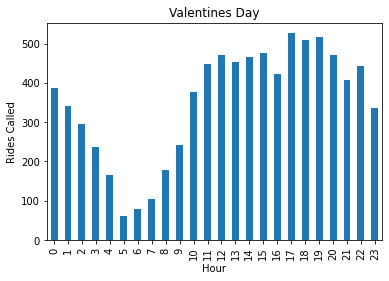

In [14]:
# Getting Valentines Day Subset

date = '2016/02/14'
date = datetime.strptime(date, '%Y/%m/%d')
st_patricks = df.loc[df['pickup_datetime'].dt.date==date.date()]
st_patricks = st_patricks.groupby(['hour']).size()
graph = st_patricks.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Rides Called")
graph.set_title("Valentines Day")

Text(0.5, 1.0, 'Martin Luther King')

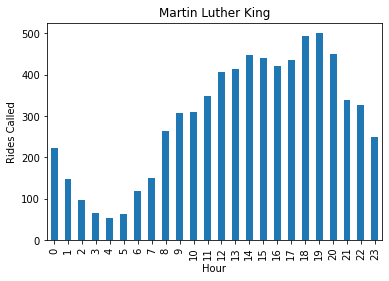

In [15]:
# Getting Martin Luther King day Subset

date = '2016/01/18'
date = datetime.strptime(date, '%Y/%m/%d')
st_patricks = df.loc[df['pickup_datetime'].dt.date==date.date()]
st_patricks = st_patricks.groupby(['hour']).size()
graph = st_patricks.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Rides Called")
graph.set_title("Martin Luther King")

In [16]:
# For Martin Luther King day and St Patricks day there is not really much change
# However for Valentines Day, Memorial day and Easter there is particularly a higher amount of rides late in the night and early in the morning
# The latter group of days are also more festive and celebratory rather than the former 
# This makes sense because more people when out during those days

## Question 3.5

Text(0.5, 1.0, 'Average speed per hour')

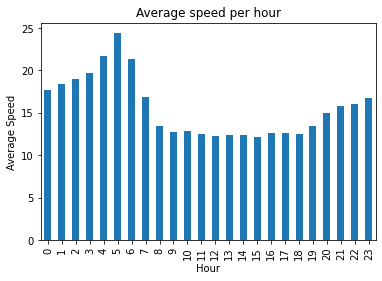

In [17]:
subset = df.groupby(['hour']).average_speed.agg('mean')
graph = subset.plot.bar()
graph.set_xlabel("Hour")
graph.set_ylabel("Average Speed")
graph.set_title("Average speed per hour")

In [18]:
# Trips are fastest at night compared to day
# This partially makes sense because during the day there is traffic so you might not be able to drive fast
# But driving fast at night is a little dangerous although I guess you can because there will not be any traffic

# Question 4

## Question 4.1

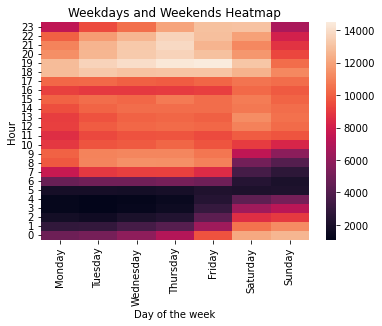

In [19]:
day_hour_groupby = df.groupby(['day_of_week','hour'])['day_of_week'].size()
day_hour_groupby.index = day_hour_groupby.index.set_names(['day','hours'])
day_hour_groupby = day_hour_groupby.reset_index()

Monday = day_hour_groupby.loc[day_hour_groupby['day'] =="Monday"].values
Tuesday = day_hour_groupby.loc[day_hour_groupby['day']=="Tuesday"].values
Wednesday = day_hour_groupby.loc[day_hour_groupby['day']=="Wednesday"].values
Thursday = day_hour_groupby.loc[day_hour_groupby['day']=="Thursday"].values
Friday = day_hour_groupby.loc[day_hour_groupby['day']=="Friday"].values
Saturday = day_hour_groupby.loc[day_hour_groupby['day']=="Saturday"].values
Sunday = day_hour_groupby.loc[day_hour_groupby['day']=="Sunday"].values

data = np.vstack((Monday[0:24,2],Tuesday[0:24,2],Wednesday[0:24,2],Thursday[0:24,2],Friday[0:24,2],Saturday[0:24,2],Sunday[0:24,2])).T
data =  data.astype('float64')
x_axis_labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plot = sns.heatmap(data,xticklabels=x_axis_labels, yticklabels=True)
plot.set(xlabel='Day of the week', ylabel='Hour',title="Weekdays and Weekends Heatmap")
plot.invert_yaxis()

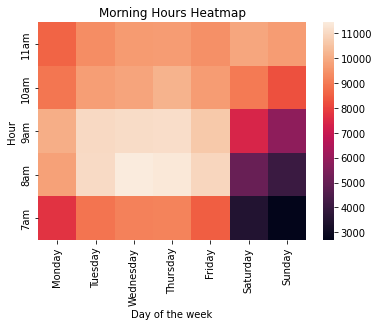

In [20]:
# Morning hours are from 7am to 11am
morning_subset = df.loc[(df['hour']>=7) & (df['hour']<=11)]

day_hour_groupby = morning_subset.groupby(['day_of_week','hour'])['day_of_week'].size()
day_hour_groupby.index = day_hour_groupby.index.set_names(['day','hours'])
day_hour_groupby = day_hour_groupby.reset_index()

Monday = day_hour_groupby.loc[day_hour_groupby['day'] =="Monday"].values
Tuesday = day_hour_groupby.loc[day_hour_groupby['day']=="Tuesday"].values
Wednesday = day_hour_groupby.loc[day_hour_groupby['day']=="Wednesday"].values
Thursday = day_hour_groupby.loc[day_hour_groupby['day']=="Thursday"].values
Friday = day_hour_groupby.loc[day_hour_groupby['day']=="Friday"].values
Saturday = day_hour_groupby.loc[day_hour_groupby['day']=="Saturday"].values
Sunday = day_hour_groupby.loc[day_hour_groupby['day']=="Sunday"].values

data = np.vstack((Monday[0:24,2],Tuesday[0:24,2],Wednesday[0:24,2],Thursday[0:24,2],Friday[0:24,2],Saturday[0:24,2],Sunday[0:24,2])).T
data =  data.astype('float64')
x_axis_labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
y_axis_labels = ["7am","8am","9am","10am","11am"]
plot = sns.heatmap(data,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plot.set(xlabel='Day of the week', ylabel='Hour',title="Morning Hours Heatmap")
plot.invert_yaxis()

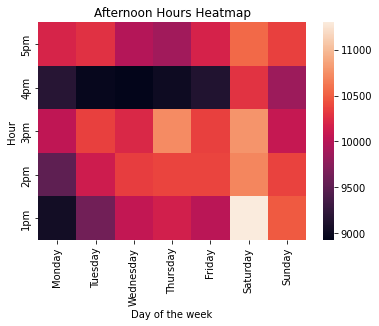

In [21]:
# Afternoon hours are from 1pm to 5pm
afternoon_subset = df.loc[(df['hour']>=13) & (df['hour']<=17)]

day_hour_groupby = afternoon_subset.groupby(['day_of_week','hour'])['day_of_week'].size()
day_hour_groupby.index = day_hour_groupby.index.set_names(['day','hours'])
day_hour_groupby = day_hour_groupby.reset_index()

Monday = day_hour_groupby.loc[day_hour_groupby['day'] =="Monday"].values
Tuesday = day_hour_groupby.loc[day_hour_groupby['day']=="Tuesday"].values
Wednesday = day_hour_groupby.loc[day_hour_groupby['day']=="Wednesday"].values
Thursday = day_hour_groupby.loc[day_hour_groupby['day']=="Thursday"].values
Friday = day_hour_groupby.loc[day_hour_groupby['day']=="Friday"].values
Saturday = day_hour_groupby.loc[day_hour_groupby['day']=="Saturday"].values
Sunday = day_hour_groupby.loc[day_hour_groupby['day']=="Sunday"].values

data = np.vstack((Monday[0:24,2],Tuesday[0:24,2],Wednesday[0:24,2],Thursday[0:24,2],Friday[0:24,2],Saturday[0:24,2],Sunday[0:24,2])).T
data =  data.astype('float64')
x_axis_labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
y_axis_labels = ["1pm","2pm","3pm","4pm","5pm"]
plot = sns.heatmap(data,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plot.set(xlabel='Day of the week', ylabel='Hour',title="Afternoon Hours Heatmap")
plot.invert_yaxis()

## Question 4.2

In [22]:
#Create filters for dates and times
start_fri = datetime.strptime('23:00:00', '%H:%M:%S').time()
end_fri = datetime.strptime('23:59:59', '%H:%M:%S').time()
start_sat = datetime.strptime('00:00:00', '%H:%M:%S').time()
end_sat = datetime.strptime('02:00:00', '%H:%M:%S').time()

friday_mask = (df["pickup_datetime"].dt.weekday == 5) & (df["pickup_datetime"].dt.time.between(start_fri, end_fri))
saturday_mask =  (df["pickup_datetime"].dt.weekday == 6) & (df["pickup_datetime"].dt.time.between(start_sat, end_sat))


start_thur = datetime.strptime('17:00:00', '%H:%M:%S').time()
end_thur = datetime.strptime('20:00:00', '%H:%M:%S').time()
thursday_mask = (df["pickup_datetime"].dt.weekday == 4) & (df["pickup_datetime"].dt.time.between(start_thur, end_thur))

new_df = df[friday_mask | saturday_mask | thursday_mask]

In [23]:
from sklearn.cluster import DBSCAN

In [ ]:
kms_per_radian = 6371.0088
epsilon = new_df["distance"].max() / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=2, algorithm="ball_tree", metric="haversine")
points = np.array(new_df[["pickup_longitude","pickup_latitude"]], dtype="float64")
db.fit(np.radians(points))

NameError: name 'new_df' is not defined

In [ ]:
clusters_labels = db.labels_
clusters = pd.Series([points[cluster_labels == n] for n in range(num_clusters)])
print("There are " + clusters.shape[0] + " clusters.")

In [ ]:
fig, ax  = plt.subplots()
ax1 = ax.scatter(new_df["pickup_longitude"], new_df["pickup_latitude"], alpha=0.3)


# Question 5

In [24]:
print(haversine_np(0,0,0.000400,0.000400)*1000)

62.86185703808761


In [ ]:
# Using the Haversine method above we can see we can deviate 0.000200 in both directions in the longitude and latidude.
# This will result in us having a radius of around 30m which should be an acceptable radius given how large these landmarks are.

In [25]:
# Empire State Building: (40.756724, -73.983806)
# JFK Airport: (40.647929, -73.777813)

subset = df.loc[(df['pickup_longitude'] >= 40.756524) & (df['pickup_longitude'] <= 40.756924) &
                (df['pickup_latitude'] >= -73.983606) & (df['pickup_latitude'] <= -73.984006) &
                (df['dropoff_longitude'] >= 40.647729) & (df['dropoff_longitude'] <= 40.648229) & 
                (df['dropoff_latitude'] >= -73.777613) & (df['dropoff_latitude'] <= -73.778013)]

mean = subset["trip_duration"].mean()
print(mean)

nan


In [26]:
# Empire State Building: (40.756724, -73.983806)
# Newark Airport: (40.689442, -74.173242)

subset = df.loc[(df['pickup_latitude'] >= 40.756524) & (df['pickup_latitude'] <= 40.756924) &
                (df['pickup_longitude'] >= -73.983606) & (df['pickup_longitude'] <= -73.984006) &
                (df['dropoff_latitude'] >= 40.689242) & (df['dropoff_latitude'] <= 40.689642) & 
                (df['dropoff_longitude'] >= 74.173042) & (df['dropoff_longitude'] <= 74.173442)]

mean = subset["trip_duration"].mean()
print(mean)

nan


# Question 6

In [27]:
import geopandas as gpd

In [28]:
boroughs = gpd.read_file("nyc.shp")

In [29]:
boroughs["area"] = boroughs.area
boroughs["boundary"] = boroughs.boundary
boroughs["centroid"] = boroughs.centroid
boroughs.crs

<ipython-input-29-7314e476fe39>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boroughs["area"] = boroughs.area
<ipython-input-29-7314e476fe39>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boroughs["centroid"] = boroughs.centroid


<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [ ]:
df["pickup"] = gpd.points_from_xy(df["pickup_longitude"], df["pickup_latitude"])
df["dropoff"] = gpd.points_from_xy(df["dropoff_longitude"], df["dropoff_latitude"])

In [ ]:
b_len = boroughs.shape[0]
d_len = df.shape[0]

In [ ]:
pickup_point = gpd.GeoSeries(df["pickup"])
dropoff_point = gpd.GeoSeries(df["dropoff"])
name = gpd.GeoSeries(boroughs["ntaname"])
geometry = gpd.GeoSeries(boroughs["geometry"])
p_neighbourhood = gpd.GeoSeries(df["id"])
d_neighbourhood = gpd.GeoSeries(df["id"])

<ipython-input-47-f82d7b534fd3>:3: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  name = gpd.GeoSeries(boroughs["ntaname"])
<ipython-input-47-f82d7b534fd3>:5: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  p_neighbourhood = gpd.GeoSeries(df["id"])
<ipython-input-47-f82d7b534fd3>:6: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  d_neighbourhood = gpd.GeoSeries(df["id"])


In [ ]:
for i in range(b_len):
    for j in range(d_len):
        try:
            if (pickup_point[j].within(geometry[i])):
                p_neighbourhood[j] = name[i]
            if (dropoff_point[j].within(geometry[i])):
                d_neighbourhood[j] = name[i]
        except:
            continue

In [ ]:
df["pickup_neighbourhood"] = p_neighbourhood
df["dropoff_neighbourhood"] = d_neighbourhood
df = df[df["pickup_neighbourhood"] != df["id"]]
df = df[df["dropoff_neighbourhood"] != df["id"]]

In [ ]:
pickup_tally = df["pickup_neighbourhood"].value_counts()
dropoff_tally = df["dropoff_neighbourhood"].value_counts()
boroughs["pickup_tally"] = boroughs["ntaname"].map(pickup_tally)
boroughs["dropoff_tally"] = boroughs["ntaname"].map(dropoff_tally)

In [ ]:
fig, (ax0, ax1) = plt.subplots(rows = 2)
boroughs.plot(ax = ax0, cmap = "autumn", column = "pickup_tally")
boroughs.plot(ax = ax1, cmap = "autumn", column = "dropoff_tally")
plt.legend()
plt.show()

In [ ]:
outgoing = pickup_tally.index.tolist()
incoming = dropoff_tally.index.tolist()

print(incoming[0] + " is the borough with the most incoming trips.\n" + outgoing[0] + "is the place with the most outgoing trips.")


In [ ]:
#Create filters
start_time = datetime.strptime('00:00:00', '%H:%M:%S').time()
end_time = datetime.strptime('05:00:00', '%H:%M:%S').time()
time_filter = (df["pickup_datetime"].dt.time.between(start_time, end_time))
activity = dropoff_tally.add(pickup_tally)
activity_list = activity.index.tolist()
print("The busiest neighbourhood is " + activity_list[0] + ".\nThe quietest neighbourhood is " + activity_list[len(activity_list) - 1] + ".")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f16a16a-4980-4ea6-ac66-512dcf5d8b4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>